# Figure 3. Coupling strength determines reshufling of neural activity in network models

In [33]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats

import functions as fun
from scipy.interpolate import interp1d

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42



Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
RATES=np.load('simulations/RATES.npy')
Possible_J=np.load('simulations/Possible_J.npy')
params=np.load('simulations/params.npy')
sigma_t,tau_rp,g_E,g_I,beta,K,sigma_Lambda_over_Lambda,ell,r_X,Tmax_over_tau_E,p,sigma_X_over_r_X,Lambda,N_E,N_I=params[:]
L=[0,ell]

Lambda=10**-3
sigma_Lambda=sigma_Lambda_over_Lambda*Lambda

ALL_moments_of_mu=np.loadtxt('ALL_moments_of_mu.txt')

In [35]:
#'''
mu_tab_max=10.0;
mu_tab=np.linspace(-mu_tab_max,mu_tab_max,200000)
mu_tab=np.concatenate(([-10000],mu_tab))
mu_tab=np.concatenate((mu_tab,[10000]))

phi_tab_E,phi_tab_I=mu_tab*0,mu_tab*0;
for idx in range(len(phi_tab_E)):
    phi_tab_E[idx]=fun.comp_phi_tab(mu_tab[idx],fun.tau_E,tau_rp,sigma_t)
    phi_tab_I[idx]=fun.comp_phi_tab(mu_tab[idx],fun.tau_I,tau_rp,sigma_t)

phi_int_E=interp1d(mu_tab, phi_tab_E, kind='linear')  
phi_int_I=interp1d(mu_tab, phi_tab_I, kind='linear')
Phi=[phi_int_E,phi_int_I];
#'''

/Users/ale/Dropbox/research/Laser_on_E_cells/Draft_figures_simulations_v2/Figure_4/v2/functions.py:53: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  adelleh=integrate.quad(lambda u: f(u),minimo,massimo)
/Users/ale/Dropbox/research/Laser_on_E_cells/Draft_figures_simulations_v2/Figure_4/v2/functions.py:53: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  adelleh=integrate.quad(lambda u: f(u),minimo,massimo)


<ipython-input-50-f7215d7e87ca>:103: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist_Delta, bin_edges_Delta=np.histogram(Delta_Sim,bin_edges_Delta,normed=True)
<ipython-input-50-f7215d7e87ca>:103: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist_Delta, bin_edges_Delta=np.histogram(Delta_Sim,bin_edges_Delta,normed=True)


idx_J=0
E cells
0.06099618143665416
0.07275903894258477
I cells
0.595951352414435
0.5961999221685235
idx_J=1
E cells
-0.3335451695079111
-0.3868954251819993
I cells
-0.24118761811344203
-0.22101564230976425


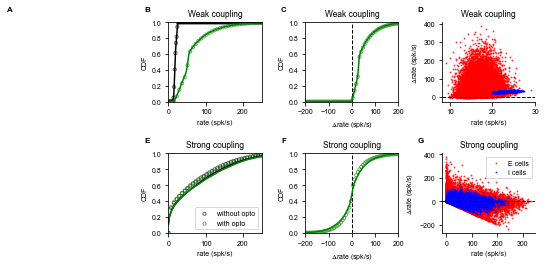

In [50]:
bin_edges=np.arange(0,1./tau_rp,.1)
spacings=np.diff(bin_edges)[0];
bin_means=0.5*(bin_edges[0:-1]+bin_edges[1::])
bin_edges_Delta=np.arange(-1./tau_rp,1./tau_rp,.1)
spacings_Delta=np.diff(bin_edges)[0];
bin_means_Delta=0.5*(bin_edges_Delta[0:-1]+bin_edges_Delta[1::])

rows=2
cols=4
fig, axs = plt.subplots(rows,cols, figsize=(2.1875*cols,1.875*rows), facecolor='w', edgecolor='k')


fig.subplots_adjust(hspace = .5, wspace=.5)
area=4.0;linethicknes=1.0;
axs = axs.ravel()

axs[0].set_axis_off()
axs[0+cols].set_axis_off()

axs[0].text(-.2, 1.2,'A', transform=axs[0].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[1].text(-.2, 1.2,'B', transform=axs[1].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[2].text(-.2, 1.2,'C', transform=axs[2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[3].text(-.2, 1.2,'D', transform=axs[3].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[1+cols].text(-.2, 1.2,'E', transform=axs[1+cols].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[2+cols].text(-.2, 1.2,'F', transform=axs[2+cols].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[3+cols].text(-.2, 1.2,'G', transform=axs[3+cols].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');


for idx in range(2):
    axs[1+idx*cols].axis([0,250,0,1])
    axs[1+idx*cols].set_ylabel('CDF')
    axs[1+idx*cols].set_xlabel('rate (spk/s)')
    
    axs[2+idx*cols].axis([-200,200,0,1])
    axs[2+idx*cols].set_xlabel(r'$\Delta$rate (spk/s)')
    axs[2+idx*cols].set_ylabel('CDF')
    axs[2+idx*cols].axvline(x=0,ls='--',c='k')
    
    axs[3+idx*cols].set_xlabel(r'rate (spk/s)')
    axs[3+idx*cols].set_ylabel(r'$\Delta$rate (spk/s)')
    axs[3+idx*cols].spines['top'].set_visible(False)
    axs[3+idx*cols].spines['right'].set_visible(False)
    axs[3+idx*cols].axhline(y=0,ls='--',c='k')
    
for idx in range(3):
    axs[1+idx+0*cols].set_title('Weak coupling')
    axs[1+idx+1*cols].set_title('Strong coupling')
    

label=['without opto','with opto']   
for idx_cases in [0,1]:#range(len(Possible_J)):
    if idx_cases==0:
        idx_J=0
    if idx_cases==1:
        idx_J=1
        
    J=Possible_J[idx_J]

    moments_of_mu=ALL_moments_of_mu[idx_J]
    ALL_phi_no_opto,ALL_phi_opto=[],[]
    for idx_cell_type in [0,1]:
        if idx_cell_type==0:
            opto=[L[-1],Lambda,sigma_Lambda]


        if idx_cell_type==1:
            opto=[0,0,0]

        phi_no_opto,phi_opto=fun.Distribution_of_phi_delta_phi(Phi[idx_cell_type],moments_of_mu[(idx_cell_type*5):((idx_cell_type+1)*5)],opto)
        
        ALL_phi_no_opto=ALL_phi_no_opto+[phi_no_opto]
        ALL_phi_opto=ALL_phi_opto+[phi_opto]
    r_i_no_opto=np.concatenate((ALL_phi_no_opto[0],ALL_phi_no_opto[1][0:int(fun.gamma*len(ALL_phi_no_opto[0]))]))
    r_i_opto=np.concatenate((ALL_phi_opto[0],ALL_phi_opto[1][0:int(fun.gamma*len(ALL_phi_opto[0]))]))
    r_i=[r_i_no_opto,r_i_opto]#phi_delta_phi_E=fun.Distribution_of_phi_delta_phi(Phi[idx_cell_type],moments_of_mu[(idx_cell_type*5):((idx_cell_type+1)*5)],opto)
        
    color=['k','g',];

     
    rate_th=1.
    maks_cells=(RATES[idx_J,1,:]>=rate_th)|(RATES[idx_J,0,:]>=rate_th)
    maks_cells_MFT=(r_i[0]>=rate_th)|(r_i[1]>=rate_th)
   

    for idx_L in range(len(L)):
        indices=np.arange(0,len(bin_means),73)

        if (idx_J==0)&(idx_L==0):
            indices=np.arange(0,len(bin_means),17)

        hist, bin_edges=np.histogram(RATES[idx_J,idx_L,maks_cells],bin_edges)
        bin_mean=0.5*(bin_edges[0:-1]+bin_edges[1::])
        spacings=np.diff(bin_edges)[0];
        hist=hist/np.sum(hist*spacings)
        axs[idx_cases*cols+1].scatter(bin_mean[indices],np.cumsum(spacings*hist)[indices],
                                   lw=1.,s=10,alpha=0.6, facecolors='none', edgecolors=color[idx_L],label=(label[idx_L]));
        hist, bin_edges=np.histogram(r_i[idx_L][maks_cells_MFT],bin_edges)#,normed=True)
        P_of_nu=hist/np.sum(hist*spacings)
        axs[idx_cases*cols+1].plot(bin_mean,np.cumsum(spacings*P_of_nu),lw=1.5,c=color[idx_L])#,label=('MFT '+label[idx_L]))
        
    #print(J,len(RATES[idx_J,idx_L,maks_cells])/(N_E+N_I))
    Delta_Sim=RATES[idx_J,1,maks_cells]-RATES[idx_J,0,maks_cells]
    hist_Delta, bin_edges_Delta=np.histogram(Delta_Sim,bin_edges_Delta,normed=True)
    CDF_Resp_Delta=np.cumsum(hist_Delta*spacings_Delta)
    
    
    indices=np.arange(0,len(bin_means_Delta),73)

    axs[idx_cases*cols+2].scatter(bin_means_Delta[indices],CDF_Resp_Delta[indices],
                                  lw=1.,s=10,alpha=0.6, facecolors='none', edgecolors=color[idx_L]);
    hist_Delta, bin_edges_Delta=np.histogram((r_i[idx_L]-r_i[0])[maks_cells_MFT],bin_edges_Delta)#,normed=True)
    P_of_nu=hist_Delta/np.sum(hist_Delta*spacings_Delta)
    axs[idx_cases*cols+2].plot(bin_means_Delta,np.cumsum(spacings*P_of_nu),lw=1.5,c=color[idx_L])

    
    
    color=['r','b',];
    idx_cells=np.where((np.arange(N_E+N_I)<N_E)&maks_cells)
    axs[idx_cases*cols+3].scatter(RATES[idx_J,0,idx_cells],
                                  RATES[idx_J,1,idx_cells]-RATES[idx_J,0,idx_cells],
                                  s=1.,alpha=0.6,c=color[0],label='E cells');
    print('idx_J=%d'%idx_J)

    print('E cells')
    print(np.corrcoef(RATES[idx_J,0,idx_cells],RATES[idx_J,1,idx_cells]-RATES[idx_J,0,idx_cells])[0,1])
    idx_cells=np.where((np.arange(len(r_i[0]))<(len(r_i[0])*(1-(fun.gamma)/(1+fun.gamma))))&maks_cells_MFT)
    print(np.corrcoef(r_i[0][idx_cells],r_i[1][idx_cells]-r_i[0][idx_cells])[0,1])
    
    print('I cells')    
    idx_cells=np.where((np.arange(N_E+N_I)>=N_E)&maks_cells)
    axs[idx_cases*cols+3].scatter(RATES[idx_J,0,idx_cells],
                                  RATES[idx_J,1,idx_cells]-RATES[idx_J,0,idx_cells],
                                  s=1.,alpha=0.6,c=color[1],label='I cells');
    print(np.corrcoef(RATES[idx_J,0,idx_cells],RATES[idx_J,1,idx_cells]-RATES[idx_J,0,idx_cells])[0,1])
    idx_cells=np.where((np.arange(len(r_i[0]))>=(len(r_i[0])*(1-(fun.gamma)/(1+fun.gamma))))&maks_cells_MFT)

    print(np.corrcoef(r_i[0][idx_cells],r_i[1][idx_cells]-r_i[0][idx_cells])[0,1])

    

axs[idx_cases*cols+1].legend(loc='best')#prop={'size': 7},
                             #loc='center', bbox_to_anchor=(1.25, -.5),ncol=2)
axs[idx_cases*cols+3].legend(loc='best')##prop={'size': 7},
                             #loc='center', bbox_to_anchor=(.5, -.5),ncol=1)

plt.tight_layout()
fig.set_size_inches(1.875*cols,1.875*rows)
pic_name='Figure_4.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight', dpi=300)
pic_name='Figure_4.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)


In [44]:
7.5/4

1.875

## 

In [55]:
len(r_i[0])*(1-(fun.gamma)/(1+fun.gamma))

10000.0

In [53]:
len(r_i[0])

12500

2e-05 1.0
0.06099618143665416
0.595951352414435

0.0006 0.452
-0.3335451695079111
-0.24118761811344203



<ipython-input-66-b743e19e5225>:70: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist_Delta, bin_edges_Delta=np.histogram(Delta_Sim,bin_edges_Delta,normed=True)
<ipython-input-66-b743e19e5225>:70: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist_Delta, bin_edges_Delta=np.histogram(Delta_Sim,bin_edges_Delta,normed=True)


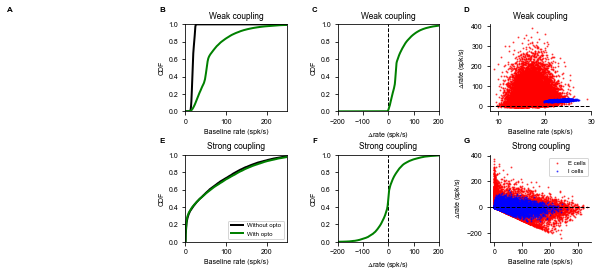

In [66]:
bin_edges=np.arange(0,1./tau_rp,.1)
spacings=np.diff(bin_edges)[0];
bin_means=0.5*(bin_edges[0:-1]+bin_edges[1::])
bin_edges_Delta=np.arange(-1./tau_rp,1./tau_rp,.1)
spacings_Delta=np.diff(bin_edges)[0];
bin_means_Delta=0.5*(bin_edges_Delta[0:-1]+bin_edges_Delta[1::])

rows=2
cols=4
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
area=4.0;linethicknes=1.0;
axs = axs.ravel()

axs[0].set_axis_off()
axs[0+cols].set_axis_off()

axs[0].text(-.2, 1.2,'A', transform=axs[0].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[1].text(-.2, 1.2,'B', transform=axs[1].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[2].text(-.2, 1.2,'C', transform=axs[2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[3].text(-.2, 1.2,'D', transform=axs[3].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[1+cols].text(-.2, 1.2,'E', transform=axs[1+cols].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[2+cols].text(-.2, 1.2,'F', transform=axs[2+cols].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[3+cols].text(-.2, 1.2,'G', transform=axs[3+cols].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');


for idx in range(2):
    axs[1+idx*cols].axis([0,250,0,1])
    axs[1+idx*cols].set_ylabel('CDF')
    axs[1+idx*cols].set_xlabel('Baseline rate (spk/s)')
    
    axs[2+idx*cols].axis([-200,200,0,1])
    axs[2+idx*cols].set_xlabel(r'$\Delta$rate (spk/s)')
    axs[2+idx*cols].set_ylabel('CDF')
    axs[2+idx*cols].axvline(x=0,ls='--',c='k')
    
    axs[3+idx*cols].set_xlabel(r'Baseline rate (spk/s)')
    axs[3+idx*cols].set_ylabel(r'$\Delta$rate (spk/s)')
    axs[3+idx*cols].spines['top'].set_visible(False)
    axs[3+idx*cols].spines['right'].set_visible(False)
    axs[3+idx*cols].axhline(y=0,ls='--',c='k')
    
for idx in range(3):
    axs[1+idx+0*cols].set_title('Weak coupling')
    axs[1+idx+1*cols].set_title('Strong coupling')
    
label=['Without opto','With opto']   
for idx_cases in [0,1]:#range(len(Possible_J)):
    if idx_cases==0:
        idx_J=0
    if idx_cases==1:
        idx_J=1
        
    J=Possible_J[idx_J]

    color=['k','g',];

    maks_cells=(RATES[idx_J,1,:]>=1)|(RATES[idx_J,0,:]>=1)
    
    for idx_L in range(len(L)):
        hist, bin_edges=np.histogram(RATES[idx_J,idx_L,maks_cells],bin_edges)
        bin_mean=0.5*(bin_edges[0:-1]+bin_edges[1::])
        spacings=np.diff(bin_edges)[0];
        hist=hist/np.sum(hist*spacings)
        axs[idx_cases*cols+1].plot(bin_mean,np.cumsum(spacings*hist),
                                   lw=2,c=color[idx_L],label=label[idx_L])

    print(J,len(RATES[idx_J,idx_L,maks_cells])/(N_E+N_I))
    Delta_Sim=RATES[idx_J,1,maks_cells]-RATES[idx_J,0,maks_cells]
    hist_Delta, bin_edges_Delta=np.histogram(Delta_Sim,bin_edges_Delta,normed=True)
    CDF_Resp_Delta=np.cumsum(hist_Delta*spacings_Delta)
    axs[idx_cases*cols+2].plot(bin_means_Delta,CDF_Resp_Delta,
                                  lw=2,c=color[idx_L]);
    color=['r','b',];
    idx_cells=np.where((np.arange(N_E+N_I)<N_E)&maks_cells)
    
    axs[idx_cases*cols+3].scatter(RATES[idx_J,0,idx_cells],
                                  RATES[idx_J,1,idx_cells]-RATES[idx_J,0,idx_cells],
                                  s=1.,alpha=0.6,c=color[0],label='E cells');
    
    print(np.corrcoef(RATES[idx_J,0,idx_cells],RATES[idx_J,1,idx_cells]-RATES[idx_J,0,idx_cells])[0,1])
    idx_cells=np.where((np.arange(N_E+N_I)>=N_E)&maks_cells)
    axs[idx_cases*cols+3].scatter(RATES[idx_J,0,idx_cells],
                                  RATES[idx_J,1,idx_cells]-RATES[idx_J,0,idx_cells],
                                  s=1.,alpha=0.6,c=color[1],label='I cells');
    print(np.corrcoef(RATES[idx_J,0,idx_cells],RATES[idx_J,1,idx_cells]-RATES[idx_J,0,idx_cells])[0,1])

    print()

axs[idx_cases*cols+1].legend(prop={'size': 6},loc='lower right')
axs[idx_cases*cols+3].legend(prop={'size': 6},loc='upper right')



fig.set_size_inches(2.5*cols,2.*rows)
pic_name='Figure_3.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight', dpi=300)
pic_name='Figure_3.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)
